In [20]:
using Images,JLD,Knet,WordTokenizers

In [5]:
!isdir("data/demo") && include("demosetup.jl")

false

In [6]:
global atype = Array{Float32}

Array{Float32,N} where N

In [18]:
include("src/newmacnetwork.jl")

scalepixel (generic function with 1 method)

In [8]:
feats,qstsns,dics = loadDemoData("data/demo/");

INFO: Loading demo features ...
INFO: Loading demo questions ...
INFO: Loading dictionaries ...


In [10]:
_,wrun,r,_,p = loadmodel("models/demo.jld";onlywrun=true);

In [ ]:
if !(typeof(first(wrun)) <: atype)
    wrun = map(atype(wrun),wrun)
end

In [11]:
w2i,a2i,i2w,i2a = dics;

In [40]:
rnd        = rand(1:length(qstsns))
inst       = qstsns[rnd]
feat       = feats[:,:,:,rnd:rnd]
question   = Array{Int}(inst[2])
answer     = inst[3];
family     = inst[4];
results,prediction = singlerun(wrun,r,feat,question;p=p);

In [41]:
answer==prediction

true

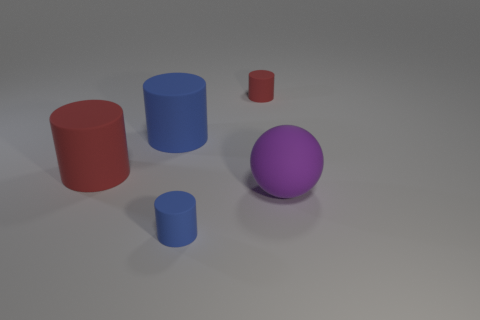

In [42]:
img = load("data/demo/CLEVR_v1.0/images/val/$(inst[1])")

In [43]:
textq  = i2w[question];
println("Question:\n",join(textq," "))
texta  = i2a[answer];
println("Answer: $(texta)\nPrediction: $(i2a[prediction]) ")

Question:
What is the color of the other small rubber thing that is the same shape as the small red thing ?
Answer: blue
Prediction: blue 


In [44]:
userinput = readline(STDIN)
words = tokenize(userinput)
question = [get!(w2i,wr,1) for wr in words]
results,prediction = singlerun(wrun,r,feat,question;p=p);
println("Question: $(join(i2w[question]," "))")
println("Prediction: $(i2a[prediction])")

stdin> What is the color of the other small rubber thing that is the same shape as the small red thing ?
Question: What is the color of the other small rubber thing that is the same shape as the small red thing ?
Prediction: blue


step_1 most attn. wrds: String["other", "rubber"]


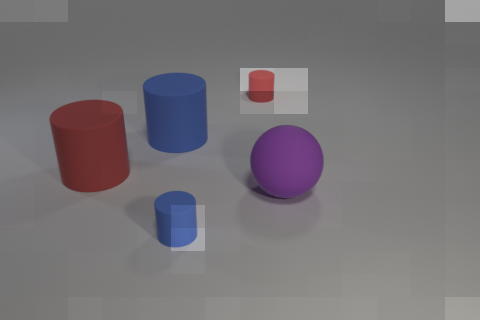

step_2 most attn. wrds: String["?", "as"]


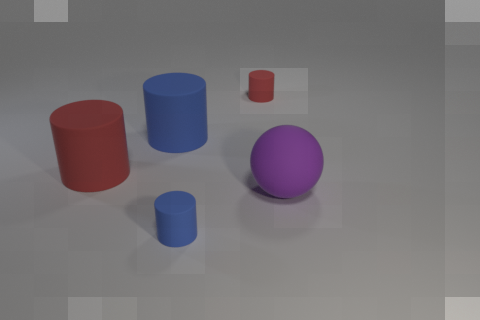

step_3 most attn. wrds: String["the", "?"]


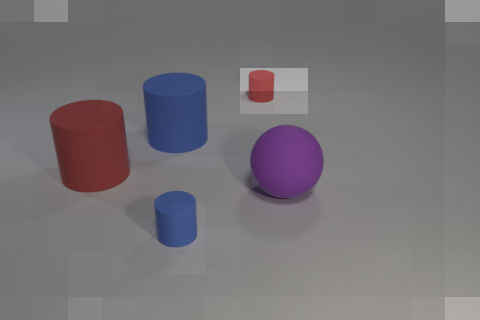

step_4 most attn. wrds: String["that", "is"]


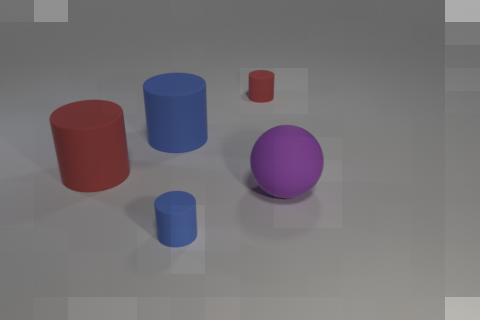

step_5 most attn. wrds: String["other", "the"]


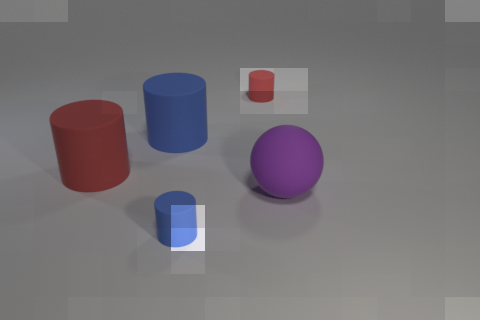

step_6 most attn. wrds: String["?", "as"]


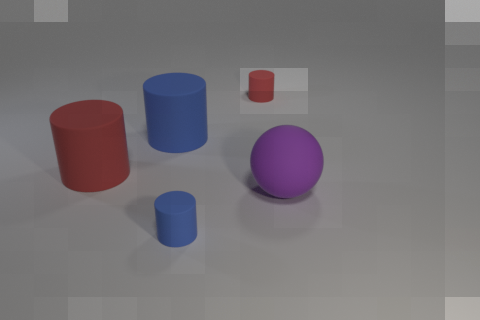

step_7 most attn. wrds: String["?", "the"]


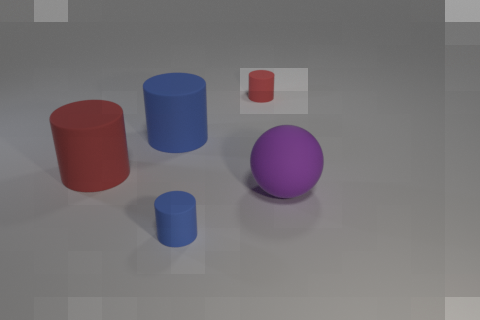

step_8 most attn. wrds: String["?", "the"]


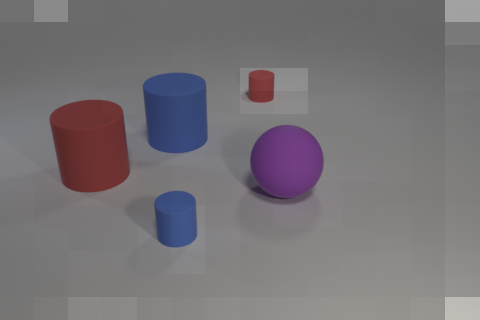

step_9 most attn. wrds: String["?", "shape"]


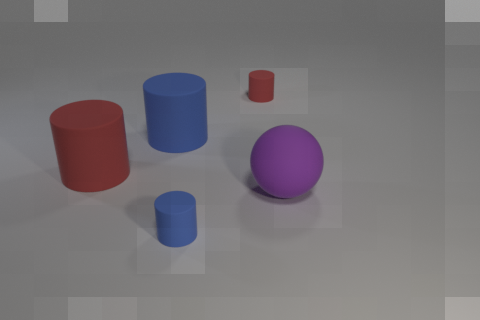

step_10 most attn. wrds: String["red", "small"]


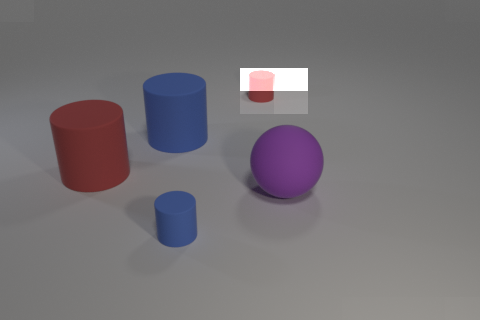

step_11 most attn. wrds: String["same", "of"]


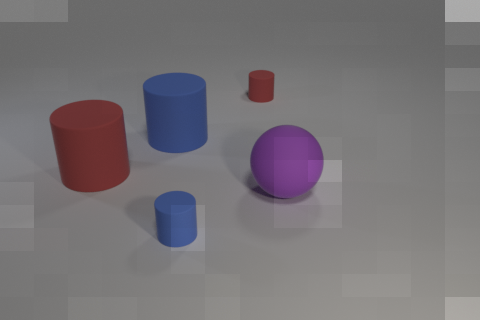

step_12 most attn. wrds: String["other", "rubber"]


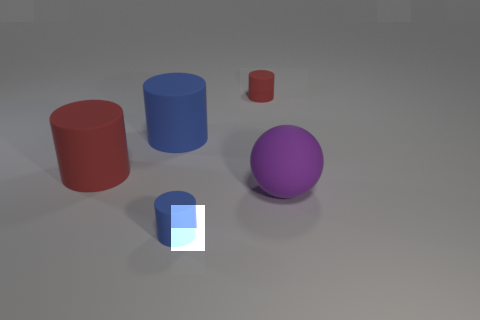

In [45]:
visualize(img,results;p=p)